CONTENTS:
- [Compute stats for Team members](#compute-stats-for-team-members)
  - [Authenticate GitHub Client](#authenticate-github-client)
  - [Define Time Period](#define-time-period)
  - [Pre-feth all the data you need in cache](#pre-feth-all-the-data-you-need-in-cache)
  - [Collect Daily Metrics](#collect-daily-metrics)
  - [a. Compare users Total performance across all repos since last 3 months](#a.-compare-users-total-performance-across-all-repos-since-last-3-months)
  - [Performance Evaluation](#performance-evaluation)

<a name='compute-stats-for-team-members'></a>
# Compute stats for Team members

In [1]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet jupyterlab-vim PyGithub)"
!jupyter labextension enable

In [16]:
import datetime
import logging
import os

import github_utils

# Enable logging.
logging.basicConfig(level=logging.INFO)
_LOG = logging.getLogger(__name__)

In [17]:
# importlib.reload(github_utils)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='authenticate-github-client'></a>
## Authenticate GitHub Client

In [ ]:
os.environ["GITHUB_ACCESS_TOKEN"] = ""

In [5]:
access_token = os.getenv("GITHUB_ACCESS_TOKEN")
if not access_token:
    _LOG.error("GITHUB_ACCESS_TOKEN not set. Exiting.")
    raise ValueError("Set GITHUB_ACCESS_TOKEN environment variable")
client = github_utils.GitHubAPI(access_token=access_token).get_client()

In [6]:
users = github_utils.get_github_contributors(
    client, repo_names=["causify-ai/cmamp"]
)
print(users)

{'causify-ai/cmamp': ['gpsaggese', 'gitpaulsmith', 'rheenina', 'DanilYachmenev', 'jsmerix', 'PomazkinG', 'gad26032', 'tamriq', 'plyq', 'mongolianjesus', 'dremdem', 'sonaalKant', 'Sameep2808', 'Shayawnn', 'sonniki', 'samarth9008', 'heanhsok', 'Vedanshu7', 'mindfreakthemon', 'max-rsrch', 'pavolrabatin', 'amrawadk', 'Shaunak01', 'Jd8111997', 'tkpratardan', 'alinakhay', 'Tsallagov', 'neha2801-create', 'katerynak', 'aish-nidhi', 'jayati1397', 'elforeee', 'k0nsta', 'why2000', 'lizvladi', 'Vitaly-Protasov', 'OlgaVakhonina', 'tuimazy2008', 'enotdima', 'cma0416', 'zet694', 'daberezina', 'jserebr', 'pavel-particle', 'k911mipt', 'LibertasSpZ', 'RichardProchadzka', 'sumedha-24', 'andsilver', 'vvandriichuk']}


In [7]:
users_cmamp = [
    "gpsaggese",
    "gitpaulsmith",
    "rheenina",
    "DanilYachmenev",
    "jsmerix",
    "PomazkinG",
    "tamriq",
    "mongolianjesus",
    "dremdem",
    "Sameep2808",
    "Shayawnn",
    "sonniki",
    "samarth9008",
    "heanhsok",
    "Vedanshu7",
    "pavolrabatin",
    "amrawadk",
    "Shaunak01",
    "Jd8111997",
    "tkpratardan",
    "cma0416",
]

<a name='define-time-period'></a>
## Define Time Period

In [8]:
# Use a long window for caching and a narrow slice for final analysis
period_full = github_utils.utc_period("2025-01-01", "2025-06-23")
# period_slice = github_utils.utc_period("2025-04-01", "2025-05-31")

<a name='pre-feth-all-the-data-you-need-in-cache'></a>
## Pre-feth all the data you need in cache

In [9]:
repos = [
    "helpers",
    "tutorials",
    "cmamp",
    "kaizenflow",
    "orange",
    "sports_analytics",
]
org = "causify-ai"

In [11]:
github_utils.prefetch_periodic_user_repo_data(
    client, org, repos, users_cmamp, period_full
)

Prefetching user-repo data:  28%|███████████████████████████████████████████████████                                                                                                                                     | 35/126 [00:00<00:00, 333.26it/s]

helpers/gpsaggese: 53 commits, 47 PRs, 53 LOC entries, 12 issues assigned, 3 closed
helpers/gitpaulsmith: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
helpers/rheenina: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/DanilYachmenev: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
helpers/jsmerix: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/PomazkinG: 0 commits, 3 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/tamriq: 0 commits, 1 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/mongolianjesus: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
helpers/dremdem: 23 commits, 26 PRs, 23 LOC entries, 15 issues assigned, 14 closed
helpers/Sameep2808: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/Shayawnn: 0 commits, 0 PRs, 0 LOC entries, 2 issues assigned, 0 closed
helpers/sonniki: 52 commits, 53 PRs, 52 LOC entries, 44 issues assigned, 38 closed
helpers/samarth9008: 1 

Prefetching user-repo data: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 316.40it/s]
INFO:github_utils:Prefetched 126 user-repo combos in 0.40 seconds for period 2025-01-01 00:00:00+00:00 to 2025-06-23 00:00:00+00:00.


cmamp/Shaunak01: 33 commits, 39 PRs, 33 LOC entries, 54 issues assigned, 43 closed
cmamp/Jd8111997: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/tkpratardan: 11 commits, 13 PRs, 11 LOC entries, 16 issues assigned, 5 closed
cmamp/cma0416: 5 commits, 18 PRs, 5 LOC entries, 23 issues assigned, 8 closed
kaizenflow/gpsaggese: 0 commits, 0 PRs, 0 LOC entries, 1 issues assigned, 0 closed
kaizenflow/gitpaulsmith: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
kaizenflow/rheenina: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/DanilYachmenev: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/jsmerix: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/PomazkinG: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/tamriq: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/mongolianjesus: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizen

<a name='collect-daily-metrics'></a>
## Collect Daily Metrics

In [13]:
combined_df = github_utils.collect_all_metrics(
    client, org, repos, users_cmamp, period_full
)

<a name='a.-compare-users-total-performance-across-all-repos-since-last-3-months'></a>
## a. Compare users Total performance across all repos since last 3 months

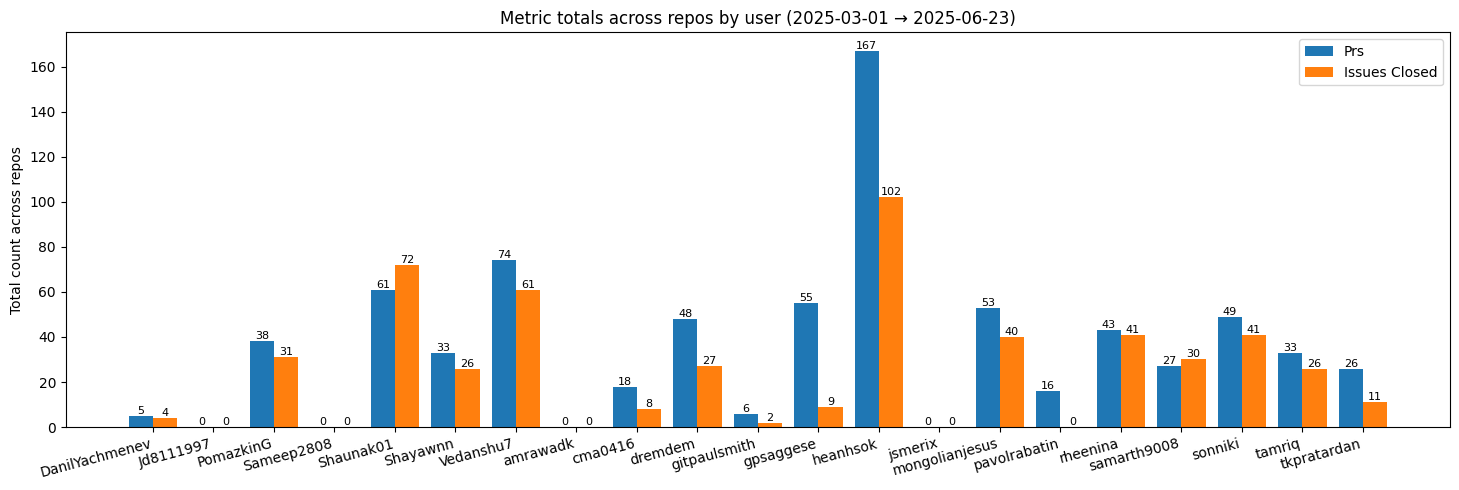

In [25]:
github_utils.plot_multi_metrics_totals_by_user(
    combined=combined_df,
    metrics=["prs", "issues_closed"],
    users=users_cmamp,
    repos=repos,
    start=datetime.datetime(2025, 3, 1),
    end=datetime.datetime(2025, 6, 23),
)

<a name='performance-evaluation'></a>
## Performance Evaluation

,prs_z,issues_closed_z
user,,
DanilYachmenev,-0.61,-0.54
Jd8111997,-0.92,-0.92
PomazkinG,-0.16,0.01
Sameep2808,-0.92,-0.92
Shaunak01,0.63,1.54
Shayawnn,-0.08,-0.02
Vedanshu7,0.64,1.10
amrawadk,-0.92,-0.92
cma0416,-0.57,-0.69


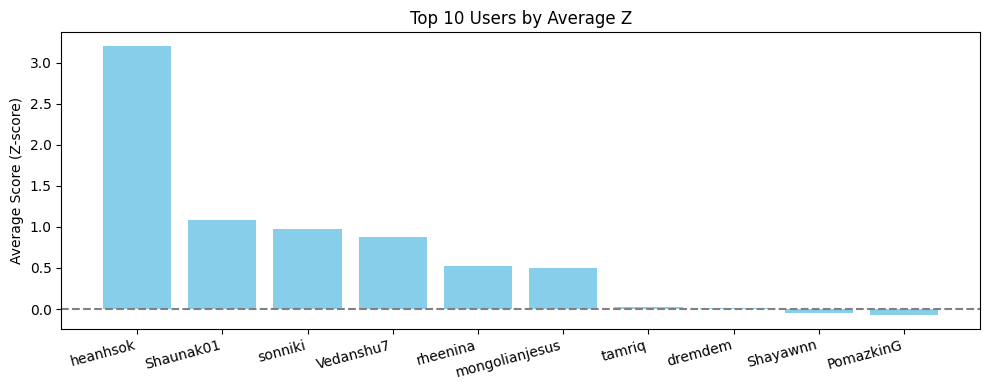

,prs_pctile,issues_closed_pctile
user,,
DanilYachmenev,0.29,0.43
Jd8111997,0.12,0.14
PomazkinG,0.50,0.62
Sameep2808,0.12,0.14
Shaunak01,0.86,0.95
Shayawnn,0.57,0.57
Vedanshu7,0.90,0.90
amrawadk,0.12,0.14
cma0416,0.33,0.33


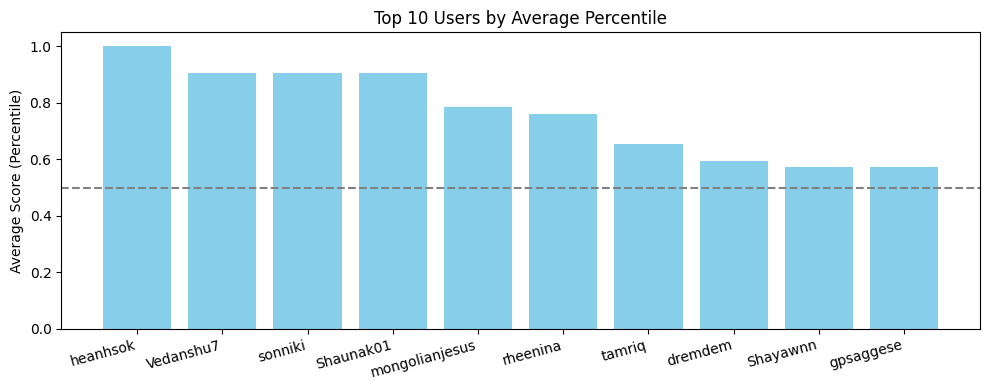

In [31]:
# Step 0: Define your slice
users = users_cmamp
repos = repos
metrics = ["prs", "issues_closed"]

# Step 1: Summarize total metrics across users/repos
summary_users = github_utils.summarize_users_across_repos(
    combined_df, users=users, repos=repos
)

# Step 2: Add z-scores and percentiles
z_df = github_utils.compute_z_scores(summary_users, metrics)
stats = github_utils.compute_percentile_ranks(z_df, metrics)

# Step 3: Visualize — will automatically pick up all *_z or *_pctile columns
github_utils.visualize_user_metric_comparison(stats, score_type="z")
github_utils.visualize_user_metric_comparison(stats, score_type="percentile")